# WeatherPy
----
### Observable Trends:
#### 1. From the "Northern Hemisphere - Max Temp vs. Latitude Linear Regression" plot we can appreciate how the temperature tends to decrease as we move far away from the equator (Latitude = 0). This indicates high temperatures close to the equator and low temperature close to the north pole.
#### 2. From the "Southern Hemisphere - Max Temp vs. Latitude Linear Regression" plot we can appreciate how the temperature tends to increase as we move closer to the equator (Latitude = 0). This indicates high temperatures close to the equator and low temperature close to the south pole.
#### 3. From the "'City Latitude vs. Cloudiness (08/05/2020)'" plot we can appreciate clusters of points around the 0, 20, 40, 75, and 100 Cloudiness % values. This may be an indicator that the data is typically reported as rounded numbers. 
#### 4. From the "'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression'" and the "Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression" plots we can appreciate how the Humidity % tendency lines remain almost flat, this indicates that the Latitude is irrelevant to the Humidity % and that they are not correlated.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
cloudiness = []
country = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
city_num = 1
city_name = []

print("Beginning Data Retrieval")
print("---------------------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cloudiness.append(response['clouds']['all']) 
        country.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        city_name.append(city)
        print(f"Processing Record {city_num} | City: {city}")
        city_num += 1
    except:
        print(f"City {city} not found. Skipping...")
        pass

Beginning Data Retrieval
---------------------------------------
Processing Record 1 | City: grindavik
Processing Record 2 | City: port-gentil
City nizhneyansk not found. Skipping...
Processing Record 3 | City: blythe
Processing Record 4 | City: rikitea
Processing Record 5 | City: souillac
Processing Record 6 | City: krasnoselkup
Processing Record 7 | City: mataura
Processing Record 8 | City: te anau
Processing Record 9 | City: new norfolk
Processing Record 10 | City: yerbogachen
Processing Record 11 | City: busselton
Processing Record 12 | City: the valley
Processing Record 13 | City: longyearbyen
Processing Record 14 | City: ahipara
Processing Record 15 | City: koslan
Processing Record 16 | City: punta arenas
Processing Record 17 | City: massaguet
City taolanaro not found. Skipping...
Processing Record 18 | City: kulhudhuffushi
Processing Record 19 | City: raga
Processing Record 20 | City: hilo
Processing Record 21 | City: ostrovnoy
Processing Record 22 | City: albany
Processing Reco

Processing Record 191 | City: srivardhan
Processing Record 192 | City: comodoro rivadavia
Processing Record 193 | City: mahebourg
Processing Record 194 | City: cherskiy
Processing Record 195 | City: leningradskiy
Processing Record 196 | City: zinder
Processing Record 197 | City: akyab
Processing Record 198 | City: san vicente
Processing Record 199 | City: college
Processing Record 200 | City: murillo
City marcona not found. Skipping...
Processing Record 201 | City: krasnyy chikoy
Processing Record 202 | City: orlik
Processing Record 203 | City: puerto escondido
Processing Record 204 | City: bac lieu
Processing Record 205 | City: poltavka
City sentyabrskiy not found. Skipping...
Processing Record 206 | City: margate
Processing Record 207 | City: obuasi
Processing Record 208 | City: dubbo
Processing Record 209 | City: vostok
Processing Record 210 | City: roald
Processing Record 211 | City: cayenne
Processing Record 212 | City: imeni poliny osipenko
Processing Record 213 | City: lasa
Proc

Processing Record 380 | City: uruzgan
Processing Record 381 | City: huarmey
Processing Record 382 | City: bilma
Processing Record 383 | City: barcelos
Processing Record 384 | City: saint-pierre
Processing Record 385 | City: berga
City toliary not found. Skipping...
Processing Record 386 | City: san patricio
Processing Record 387 | City: grand forks
Processing Record 388 | City: sorland
Processing Record 389 | City: la serena
City kuche not found. Skipping...
Processing Record 390 | City: inhambane
Processing Record 391 | City: aklavik
Processing Record 392 | City: onega
City phan rang not found. Skipping...
Processing Record 393 | City: baruun-urt
Processing Record 394 | City: daru
Processing Record 395 | City: ibra
Processing Record 396 | City: mount isa
Processing Record 397 | City: mporokoso
Processing Record 398 | City: pinega
Processing Record 399 | City: ardrishaig
Processing Record 400 | City: codajas
Processing Record 401 | City: flin flon
Processing Record 402 | City: colares


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_dict = {'City': city_name, 'Lat': lat, 'Lng': lng, 'Max Temp': max_temp, 'Humidity': humidity, 
               'Cloudiness': cloudiness, 'Wind Speed': wind_speed, 'Country': country}
cities_df = pd.DataFrame.from_dict(cities_dict)
cities_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
dtype: int64

In [5]:
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,grindavik,63.84,-22.43,50.00,93,90,14.99,IS
1,port-gentil,-0.72,8.78,74.39,81,100,13.47,GA
2,blythe,33.61,-114.60,118.99,9,4,3.00,US
3,rikitea,-23.12,-134.97,72.43,80,10,13.31,PF
4,souillac,-20.52,57.52,66.20,93,40,6.64,MU


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,21.422228,18.326250,66.324855,71.496377,51.260870,8.208406
std,33.631525,90.051595,14.867015,20.667886,40.458274,6.002053
min,-54.800000,-175.200000,24.240000,3.000000,0.000000,0.250000
25%,-7.867500,-58.935000,53.772500,62.000000,1.000000,3.760000
50%,25.525000,20.085000,67.965000,76.000000,59.500000,6.930000
75%,49.830000,100.637500,78.800000,87.000000,90.000000,11.180000
max,78.220000,178.420000,118.990000,100.000000,100.000000,55.250000


In [8]:
#  Get the indices of cities that have humidity over 100%.
high_humidity_df = pd.DataFrame(cities_df[cities_df['Humidity'] > 100]['City'])
high_humidity_df['Humidity'] = cities_df[cities_df['Humidity'] > 100]['Humidity']
high_humidity_df.head()

,City,Humidity


### Since we don't have cities with humidity levels above 100%, the DataFrame remains without changes

In [9]:
# Export the City_Data into a csv
csv_path = "../output_data/cities.csv"
cities_df.to_csv(csv_path)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

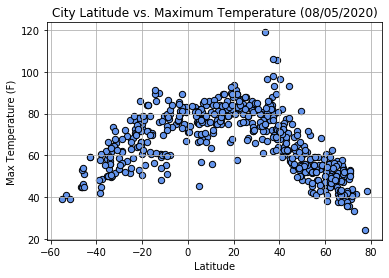

In [11]:
ax1 = cities_df.plot.scatter(x = 'Lat',
                             y = 'Max Temp',
                             title = 'City Latitude vs. Maximum Temperature (08/05/2020)',
                             c = 'cornflowerblue',
                             s = 40,
                             edgecolors = 'black',
                             grid = True)
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Max Temperature (F)")
plt.show()

## Latitude vs. Humidity Plot

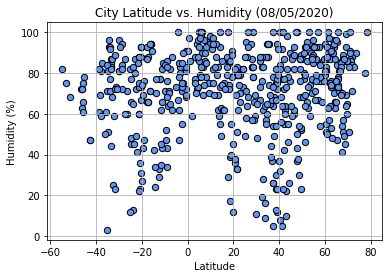

In [12]:
ax2 = cities_df.plot.scatter(x = 'Lat',
                             y = 'Humidity',
                             title = 'City Latitude vs. Humidity (08/05/2020)',
                             c = 'cornflowerblue',
                             s = 40,
                             edgecolors = 'black',
                             grid = True)
ax2.set_xlabel("Latitude")
ax2.set_ylabel("Humidity (%)")
plt.show()

## Latitude vs. Cloudiness Plot

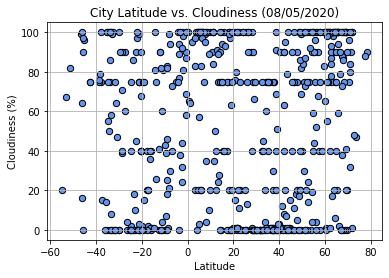

In [13]:
ax3 = cities_df.plot.scatter(x = 'Lat',
                             y = 'Cloudiness',
                             title = 'City Latitude vs. Cloudiness (08/05/2020)',
                             c = 'cornflowerblue',
                             s = 40,
                             edgecolors = 'black',
                             grid = True)
ax3.set_xlabel("Latitude")
ax3.set_ylabel("Cloudiness (%)")
plt.show()

## Latitude vs. Wind Speed Plot

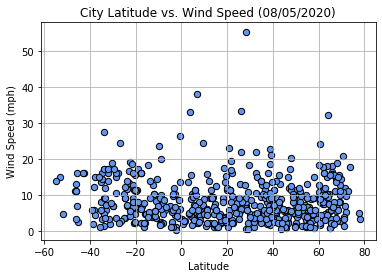

In [14]:
ax4 = cities_df.plot.scatter(x = 'Lat',
                             y = 'Wind Speed',
                             title = 'City Latitude vs. Wind Speed (08/05/2020)',
                             c = 'cornflowerblue',
                             s = 40,
                             edgecolors = 'black',
                             grid = True)
ax4.set_xlabel("Latitude")
ax4.set_ylabel("Wind Speed (mph)")
plt.show()

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression_plot(x_values, y_values, title, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-squared is: {rvalue**2}")
    plt.scatter(x_values,y_values, color='cornflowerblue', edgecolors='black')
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid()
    plt.show()

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem_df = pd.DataFrame(cities_df[cities_df['Lat'] >= 0])
southern_hem_df = pd.DataFrame(cities_df[cities_df['Lat'] < 0])

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5977071006898259


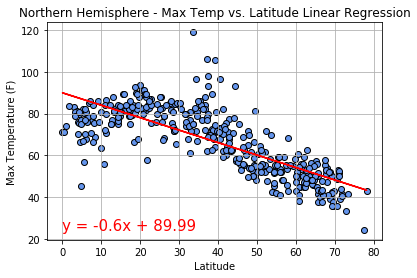

In [17]:
title = 'Northern Hemisphere - Max Temp vs. Latitude Linear Regression'
x_label = 'Latitude'
y_label = 'Max Temperature (F)'
regression_plot(northern_hem_df['Lat'], northern_hem_df['Max Temp'], title, x_label, y_label)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.509995329363538


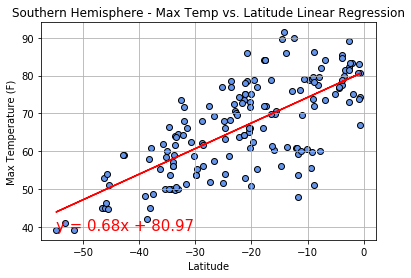

In [18]:
title = 'Southern Hemisphere - Max Temp vs. Latitude Linear Regression'
x_label = 'Latitude'
y_label = 'Max Temperature (F)'
regression_plot(southern_hem_df['Lat'], southern_hem_df['Max Temp'], title, x_label, y_label)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 2.110104628838417e-05


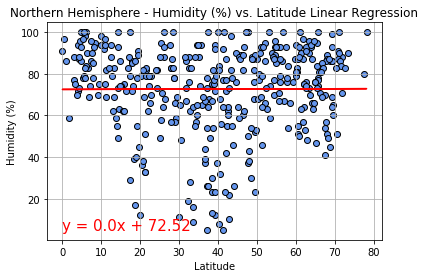

In [19]:
title = 'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression'
x_label = 'Latitude'
y_label = 'Humidity (%)'
regression_plot(northern_hem_df['Lat'], northern_hem_df['Humidity'], title, x_label, y_label)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 5.402898762109365e-05


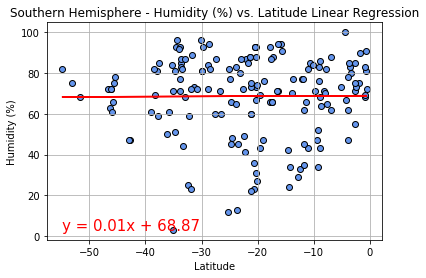

In [20]:
title = 'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression'
x_label = 'Latitude'
y_label = 'Humidity (%)'
regression_plot(southern_hem_df['Lat'], southern_hem_df['Humidity'], title, x_label, y_label)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.006726407206209284


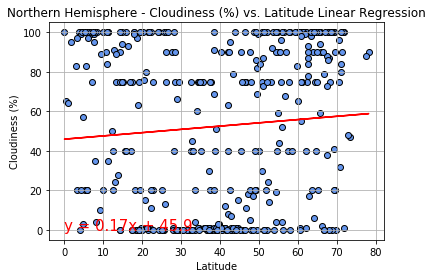

In [21]:
title = 'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression'
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
regression_plot(northern_hem_df['Lat'], northern_hem_df['Cloudiness'], title, x_label, y_label)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0006215823078381174


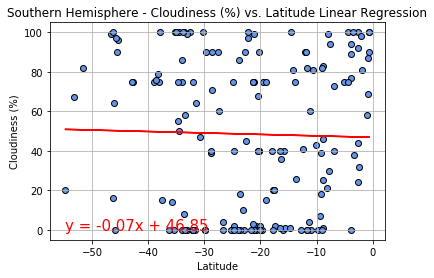

In [22]:
title = 'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression'
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
regression_plot(southern_hem_df['Lat'], southern_hem_df['Cloudiness'], title, x_label, y_label)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0038911616179087365


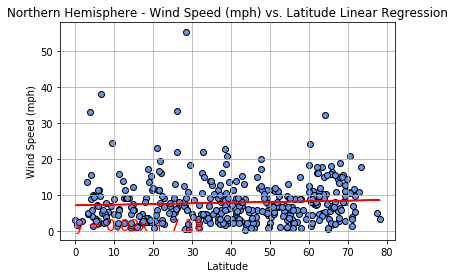

In [24]:
title = 'Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression'
x_label = 'Latitude'
y_label = 'Wind Speed (mph)'
regression_plot(northern_hem_df['Lat'], northern_hem_df['Wind Speed'], title, x_label, y_label)

####  Southern Hemisphere - Wind Speed (mph)vs. Latitude Linear Regression

The r-squared is: 0.042718697686438656


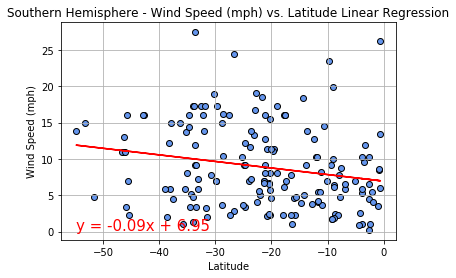

In [26]:
title = 'Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression'
x_label = 'Latitude'
y_label = 'Wind Speed (mph)'
regression_plot(southern_hem_df['Lat'], southern_hem_df['Wind Speed'], title, x_label, y_label)